In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
%matplotlib inline

In [353]:
patient=pd.read_csv('D:\OneDrive\桌面\RE_Re：MAPMG Technical Assessment - cannot find at20230927042517\Pregnancy Assessment\Patient_Table.csv',parse_dates=['birth_date'])

In [354]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   unique_patient_id  50000 non-null  int64         
 1   gender             50000 non-null  object        
 2   birth_date         50000 non-null  datetime64[ns]
 3   pat_loc_id         50000 non-null  int64         
 4   pat_pcp_id         50000 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.9+ MB


In [355]:
encounter_dx=pd.read_csv('D:\OneDrive\桌面\RE_Re：MAPMG Technical Assessment - cannot find at20230927042517\Pregnancy Assessment\Encounter_dx_Table_nodot.csv')
encounter=pd.read_csv('D:\OneDrive\桌面\RE_Re：MAPMG Technical Assessment - cannot find at20230927042517\Pregnancy Assessment\Encounter_Table.csv',parse_dates=['enc_date','due_date'])
pregnance_code=pd.read_csv('D:\OneDrive\桌面\RE_Re：MAPMG Technical Assessment - cannot find at20230927042517\Pregnancy Assessment\Pregnancy_Diagnosis_no_dot.csv')
provider=Pregnance_code=pd.read_csv('D:\OneDrive\桌面\RE_Re：MAPMG Technical Assessment - cannot find at20230927042517\Pregnancy Assessment\Provider_Table.csv')

In [425]:
encounter_dx.info()
encounter.info()
pregnance_code.info()
provider.info()
encounter_dx = encounter_dx.apply(lambda col: col.str.strip() if col.dtype == 'object' else col)
encounter = encounter.apply(lambda col: col.str.strip() if col.dtype == 'object' else col)
pregnance_code = pregnance_code.apply(lambda col: col.str.strip() if col.dtype == 'object' else col)
provider = provider.apply(lambda col: col.str.strip() if col.dtype == 'object' else col)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391641 entries, 0 to 391640
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   dx_enc_id  391641 non-null  int64 
 1   dx_line    391641 non-null  int64 
 2   dx_icd     391641 non-null  object
 3   pregancy   391641 non-null  object
 4   pregnancy  9338 non-null    object
dtypes: int64(2), object(3)
memory usage: 14.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   enc_id          150000 non-null  int64         
 1   enc_patient_id  150000 non-null  int64         
 2   visit_prov_id   150000 non-null  int64         
 3   enc_status      150000 non-null  object        
 4   enc_date        150000 non-null  datetime64[ns]
 5   due_date        2147 non-null    datetime64[ns]
dtypes: datetime64[ns](2)

In [426]:
merged_df = pd.merge(encounter, patient, left_on='enc_patient_id', right_on='unique_patient_id',how='inner')
merged_df['age'] = (merged_df['enc_date'] - merged_df['birth_date'])/ np.timedelta64(1, 'Y')
merged_df.shape

(150000, 12)

In [427]:
df_18=merged_df[merged_df['age']>=18]
df_18.enc_patient_id.nunique()

40111

In [429]:
prov_obgyn=provider[provider['prov_spec']=='OBGYN']
df_18_obgyn=df_18[df_18['visit_prov_id'].isin(prov_obgyn['prov_id'].values)]
df_18_obgyn=df_18_obgyn[df_18_obgyn['gender']=='F']
df_18_obgyn.enc_patient_id.nunique()

15148

In [430]:
encounter_dx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391641 entries, 0 to 391640
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   dx_enc_id  391641 non-null  int64 
 1   dx_line    391641 non-null  int64 
 2   dx_icd     391641 non-null  object
 3   pregancy   391641 non-null  object
 4   pregnancy  9338 non-null    object
dtypes: int64(2), object(3)
memory usage: 14.9+ MB


In [431]:
pregnance_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   code    1692 non-null   object
dtypes: object(1)
memory usage: 13.3+ KB


In [380]:
encounter_dx['pregancy']='NA'
for i in range(len(encounter_dx)):
    if encounter_dx.iloc[i,2] in pregnance_code['code'].values:
        encounter_dx.iloc[i,3] = 'Y'

In [433]:
enc_preg=encounter_dx[encounter_dx['pregancy']=='Y']
enc_preg.shape

(13906, 5)

In [434]:
condition_1=df_18_obgyn['due_date'].isnull() & df_18_obgyn['enc_id'].isin(enc_preg['dx_enc_id'].values)
condition_2=~df_18_obgyn['due_date'].isnull()
df_18_obgyn_preg = df_18_obgyn[ (condition_1 | condition_2) ]
df_18_obgyn_preg=df_18_obgyn_preg[df_18_obgyn_preg['gender']=='F']
df_18_obgyn_preg.shape 

(3425, 12)

In [435]:
unique_pt_count = df_18_obgyn_preg['enc_patient_id'].nunique()
print(unique_pt_count)

2624


In [436]:
patient_without_due_date=df_18_obgyn_preg[df_18_obgyn_preg['due_date'].isnull()]['enc_patient_id']
with_na = df_18_obgyn_preg[df_18_obgyn_preg['enc_patient_id'].isin(patient_without_due_date)]
without_na=df_18_obgyn_preg[~df_18_obgyn_preg['enc_patient_id'].isin(patient_without_due_date)]

In [462]:
print(with_na['enc_patient_id'].nunique(),without_na['enc_patient_id'].nunique())
print(with_na.shape,without_na.shape)

2347 277
(2534, 13) (891, 13)


In [438]:
without_na.loc[:,'on_time']='N'
grouped=without_na.groupby(["enc_patient_id"])
for patient_id,group in grouped:
    forty_weeks_before = group.iloc[0]['due_date']-pd.DateOffset(weeks=40)
    ts_weeks_before = group.iloc[0]['due_date']-pd.DateOffset(weeks=27)
    for index, row in group.iterrows():    
        if any((group['enc_date'] >= forty_weeks_before) & (group['enc_date'] <= ts_weeks_before)):
            without_na.loc[index, 'on_time'] = 'Y'

C:\Users\Zheng\AppData\Local\Temp\ipykernel_36956\3979303875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_na.loc[:,'on_time']='N'


In [439]:
without_na.to_csv('D:\OneDrive\桌面\RE_Re：MAPMG Technical Assessment - cannot find at20230927042517\Pregnancy Assessment\without_na.csv')
with_na.to_csv('D:\OneDrive\桌面\RE_Re：MAPMG Technical Assessment - cannot find at20230927042517\Pregnancy Assessment\with_na.csv')

In [446]:
print('On time pregnant female:',without_na[without_na['on_time']=='Y']['enc_patient_id'].nunique())
print('Not on time pregnant female:',without_na[without_na['on_time']=='N']['enc_patient_id'].nunique())

On time pregnant female: 275
Not on time pregnant female: 2


In [447]:
with_na.loc[:,'on_time']='N'
grouped=with_na.sort_values('enc_date').groupby(["enc_patient_id"])
for patient_id,group in grouped:
    enc_date = group.iloc[0]['enc_date']
    six_weeks_after=enc_date+ pd.DateOffset(weeks=6)
    for index, row in group.iterrows():    
        if any((group['enc_date'] > enc_date) & (group['enc_date'] <= six_weeks_after)):
            with_na.loc[index, 'on_time'] = 'Y'


In [448]:
print('On time pregnant female:',with_na[with_na['on_time']=='Y']['enc_patient_id'].nunique())
print('Not on time pregnant female:',with_na[with_na['on_time']=='N']['enc_patient_id'].nunique())

On time pregnant female: 38
Not on time pregnant female: 2309


In [449]:
concatenated_df = pd.concat([with_na, without_na])
ontime=concatenated_df[(concatenated_df['on_time']=='Y') & (concatenated_df['enc_status'].isin(['Completed','Compeleted']))]
ontime.shape

(959, 13)

In [450]:
ontime['enc_patient_id'].nunique()

313

In [454]:
ontime.iloc[:, list(range(1, 6)) + list(range(7, ontime.shape[1]))].head()

,enc_patient_id,visit_prov_id,enc_status,enc_date,due_date,gender,birth_date,pat_loc_id,pat_pcp_id,age,on_time
2318,44447,20,Completed,2016-02-24,NaT,F,1980-01-27,1,39,36.101370,Y
2319,44447,19,Completed,2016-02-18,NaT,F,1980-01-27,1,39,36.084932,Y
3321,36327,24,Completed,2016-11-30,NaT,F,1964-10-03,5,31,52.194521,Y
3327,36327,3,Completed,2016-11-15,NaT,F,1964-10-03,5,31,52.153425,Y
5352,19882,33,Completed,2016-09-19,NaT,F,1963-05-20,10,40,53.372603,Y


In [455]:
ontime_uni_patient=concatenated_df[(concatenated_df['on_time']=='Y') & (concatenated_df['enc_status'].isin(['Completed','Compeleted']))]['enc_patient_id'].nunique()
total_uni_patient=concatenated_df['enc_patient_id'].nunique()
ontime_uni_patient/total_uni_patient

0.11928353658536585

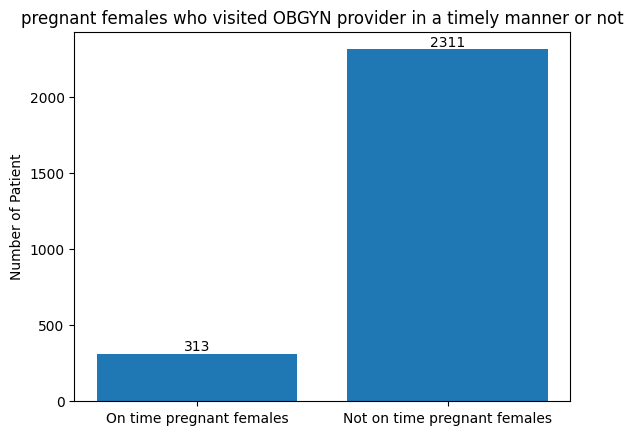

In [463]:
bars=plt.bar(['On time pregnant females','Not on time pregnant females'], [ontime_uni_patient,total_uni_patient-ontime_uni_patient])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), va='bottom', ha='center')
plt.title('pregnant females who visited OBGYN provider in a timely manner or not')
plt.ylabel('Number of Patient')
# 显示图形
plt.show()

In [459]:
ontime.to_csv('D:\OneDrive\桌面\RE_Re：MAPMG Technical Assessment - cannot find at20230927042517\Pregnancy Assessment\ontime.csv')

In [422]:
encounter_dx[encounter_dx['dx_enc_id']==112943]['dx_icd']

89210     O30003 
294657    S52043F
294658    H10229 
294659    V8011XD
Name: dx_icd, dtype: object

In [421]:
encounter_dx[encounter_dx['dx_enc_id']==112943]['dx_icd'].isin(pregnance_code['code'].values)

89210     False
294657    False
294658    False
294659    False
Name: dx_icd, dtype: bool

In [415]:
pregnance_code[pregnance_code['code']=='O30003']

,code
358,O30003


In [423]:
'O30003' in pregnance_code['code'].values

True

In [419]:
encounter_dx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391641 entries, 0 to 391640
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   dx_enc_id  391641 non-null  int64 
 1   dx_line    391641 non-null  int64 
 2   dx_icd     391641 non-null  object
 3   pregancy   391641 non-null  object
 4   pregnancy  9338 non-null    object
dtypes: int64(2), object(3)
memory usage: 14.9+ MB


In [424]:
# Extracting the 'dx_icd' value for the problematic row
problematic_dx_icd = encounter_dx.loc[89210, 'dx_icd']

# Checking its value, stripped value, and if it equals 'O30003'
(problematic_dx_icd, 
 problematic_dx_icd.strip(), 
 problematic_dx_icd == 'O30003', 
 problematic_dx_icd.strip() == 'O30003')


('O30003 ', 'O30003', False, True)